# Threat Detection System

### About the data
To cite the dataset please reference it as “Stratosphere Laboratory. A labeled dataset with malicious and benign IoT network traffic. January 22th. Agustin Parmisano, Sebastian Garcia, Maria Jose Erquiaga. https://www.stratosphereips.org/datasets-iot23



This dataset includes labels that explain the linkages between flows connected with harmful or possibly malicious activity to provide network malware researchers and analysts with more thorough information. These labels were painstakingly created at the Stratosphere labs using malware capture analysis.

We present a concise explanation of the labels used for the identification of malicious flows, based on manual network analysis, below:

Attack: This label signifies the occurrence of an attack originating from an infected device directed towards another host. Any flow that endeavors to exploit a vulnerable service, discerned through payload and behavioral analysis, falls under this classification. Examples include brute force attempts on telnet logins or header-based command injections in GET requests.

Benign: The "Benign" label denotes connections where no suspicious or malicious activities have been detected.

C&C (Command and Control): This label indicates that the infected device has established a connection with a Command and Control server. This observation is rooted in the periodic nature of connections or activities such as binary downloads or the exchange of IRC-like or decoded commands.

DDoS (Distributed Denial of Service): "DDoS" is assigned when the infected device is actively involved in a Distributed Denial of Service attack, identifiable by the volume of flows directed towards a single IP address.

FileDownload: This label signifies that a file is being downloaded to the infected device. It is determined by examining connections with response bytes exceeding a specified threshold (typically 3KB or 5KB), often in conjunction with known suspicious destination ports or IPs associated with Command and Control servers.

HeartBeat: "HeartBeat" designates connections where packets serve the purpose of tracking the infected host by the Command and Control server. Such connections are identified through response bytes below a certain threshold (typically 1B) and exhibit periodic similarities. This is often associated with known suspicious destination ports or IPs linked to Command and Control servers.

Mirai: This label is applied when connections exhibit characteristics resembling those of the Mirai botnet, based on patterns consistent with common Mirai attack profiles.

Okiru: Similar to "Mirai," the "Okiru" label is assigned to connections displaying characteristics of the Okiru botnet. The parameters for this label are the same as for Mirai, but Okiru is a less prevalent botnet family.

PartOfAHorizontalPortScan: This label is employed when connections are involved in a horizontal port scan aimed at gathering information for potential subsequent attacks. The labeling decision hinges on patterns such as shared ports, similar transmitted byte counts, and multiple distinct destination IPs among the connections.

Torii: The "Torii" label is used when connections exhibit traits indicative of the Torii botnet, with labeling criteria similar to those used for Mirai, albeit in the context of a less common botnet family.

|Field Name	| Description| Type|
|-----------|-----------|------|
|ts|The timestamp of the connection event.	|time|
|uid	|A unique identifier for the connection.	|string|
|id.orig_h	|The source IP address.	|addr|
|id.orig_p	|The source port.	|port|
|id.resp_h	|The destination IP address.	|addr|
|id.resp_p	|The destination port.	|port|
|proto	|The network protocol used (e.g., 'tcp').	|enum|
|service|The service associated with the connection.	|string|
|duration	|The duration of the connection.	|interval|
|orig_bytes	|The number of bytes sent from the source to the destination.	|count|
|resp_bytes	|The number of bytes sent from the destination to the source.	|count|
|conn_state	|The state of the connection.	|string|
|local_orig	|Indicates whether the connection is considered local or not.	|bool|
|local_resp	|Indicates whether the connection is considered local or not.	|bool|
|missed_bytes|The number of missed bytes in the connection.	|count|
|history	|A history of connection states.	|string|
|orig_pkts	|The number of packets sent from the source to the destination.	|count|
|orig_ip_bytes	|The number of IP bytes sent from the source to the destination.	|count|
|resp_pkts	|The number of packets sent from the destination to the source.	|count|
|resp_ip_bytes	|The number of IP bytes sent from the destination to the source.	|count|
|tunnel_parents	|Indicates if this connection is part of a tunnel.	|set[string]|
|label	|A label associated with the connection (e.g., 'Malicious' or 'Benign').	|string|
|detailed-label	|A more detailed description or label for the connection.	|string|

### Importing the Dataset and Library dependencies


In [2]:


# Importing all the dependencies needed on the projects 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Importing Libraries needed for Building Neural network 
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

ModuleNotFoundError: No module named 'matplotlib'

The code you provided is an import statement block in Python. It's bringing in various libraries and functions that are likely used for data analysis and machine learning tasks. Here's a breakdown of the different sections:

1. General-Purpose Libraries:

numpy (np): Provides numerical computing capabilities, arrays, and mathematical functions.
pandas (pd): Used for data manipulation, analysis, and I/O operations, especially for working with CSV files.
tensorflow (tf): A powerful library for deep learning and machine learning.
matplotlib.pyplot (plt): Used for creating visualizations like charts and plots.
seaborn (sns): Built on top of matplotlib, providing a higher-level interface for creating statistical data visualizations.
preprocessing and decomposition from sklearn: Modules for data preprocessing (e.g., scaling) and dimensionality reduction techniques (e.g., PCA, TSNE) that can be useful for preparing data for machine learning models.
time: Provides functions for measuring time intervals, which could be used for performance profiling.
2. Classification Libraries:

Various classifiers from sklearn.linear_model, sklearn.svm, sklearn.neighbors, sklearn.tree, and sklearn.ensemble: These libraries offer a wide range of classification algorithms, including Logistic Regression, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), Decision Trees, Random Forests, Gradient Boosting, and XGBoost.
collections: Provides data structures like Counter that might be helpful for analyzing data distributions.
3. Other Libraries:

train_test_split from sklearn.model_selection: Used to split data into training and testing sets for model evaluation.
make_pipeline and imbalanced_make_pipeline: Functions for creating pipelines that combine data preprocessing and model fitting steps. imbalanced_make_pipeline is specifically designed for handling imbalanced datasets (where some classes have much fewer samples than others).
SMOTE and NearMiss from imblearn.over_sampling and imblearn.under_sampling: Techniques for addressing imbalanced datasets by oversampling (creating synthetic data points for minority classes) or undersampling (removing data points from majority classes).
classification_report_imbalanced from imblearn.metrics: Provides a classification report that considers class imbalance.
precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report from sklearn.metrics: Functions for evaluating the performance of machine learning models.
KFold and StratifiedKFold from sklearn.model_selection: Techniques for implementing cross-validation to assess model performance more robustly.
warnings: Used to suppress warnings that might clutter the output.
4. Neural Network Libraries:

keras: A popular deep learning library.
backend (K) from keras: Provides access to the underlying computational backend (e.g., TensorFlow).
Sequential and Dense from keras.models and keras.layers: Used to build sequential neural network architectures with dense (fully connected) layers.
Activation from keras.layers.core: Functions for applying activation functions to layers in a neural network.
Adam from keras.optimizers: An optimizer used to train neural networks.
categorical_crossentropy from keras.metrics: A loss function commonly used for multi-class classification problems.
In summary, this code sets the stage for data analysis, machine learning model building (including both classical and deep learning approaches), and model evaluation. By understanding the purpose of these libraries, you can gain a better understanding of the overall project's goals.

### Loading data from the file

In [ ]:
original_df = pd.read_csv(r'C:\Users\Olayinka Akerekan\Documents\web threat\CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv', delimiter="|")

This line of code is loading the data from a CSV file assumed to contain information about web threats into a DataFrame object (tabular data structure) in Python for further analysis. If the data loading is successful, original_df will now hold the table of data from the CSV file.

### Generating a random sample of 200000 rows of data

In [ ]:
random_sample_df = original_df.sample(n=200000, random_state=42)

# Create a copy of the randomly sampled DataFrame to avoid modifying the original data.
file = random_sample_df.copy()

This code creates a random subset of data for further analysis while preserving the original data for potential future use.

In [ ]:
file.head(10)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
344375,1.526010e+09,Cq6FWN3Ywzs95oALG2,192.168.100.103,53854.0,120.10.164.48,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
883270,1.526229e+09,Co0sIV2OSOJECc0jE3,192.168.100.103,36495.0,61.182.158.196,9527.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
94977,1.525915e+09,C4rbZX3Ybr3osgdch6,192.168.100.103,56144.0,107.159.11.133,9527.0,tcp,-,0.998941,0,...,-,0.0,S,2.0,120.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
552763,1.526090e+09,Cw5ilM1d22NAOq9zR1,192.168.100.103,43763.0,172.180.210.202,41534.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
796999,1.526191e+09,CWBbvj2n84ONnUk1Pg,192.168.100.103,40038.0,134.153.182.254,2323.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
69288,1.525905e+09,CCHoFVLHtGzJIwXkd,192.168.100.103,43763.0,208.35.225.97,30672.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
402705,1.526033e+09,CvRFon4WHY1MPm45Ae,192.168.100.103,35763.0,59.209.98.144,23.0,tcp,-,2.998788,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
536547,1.526084e+09,C7KOl6100E8kUYgi3,192.168.100.103,42284.0,163.111.238.169,2323.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
655559,1.526131e+09,C4Qym9bgwCnTdDZAj,192.168.100.103,43763.0,48.62.161.124,44078.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
749796,1.526171e+09,CrsCWe46M0fOwANhU5,192.168.100.103,43763.0,32.220.24.150,17773.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-


## Data Preprocessing

In [ ]:
# Replace hyphens ('-') with pandas' NA values for better handling of missing or undefined data.
file.replace('-', pd.NA, inplace=True)

file.head(10)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
344375,1.526010e+09,Cq6FWN3Ywzs95oALG2,192.168.100.103,53854.0,120.10.164.48,23.0,tcp,<NA>,<NA>,<NA>,...,<NA>,0.0,S,1.0,60.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan
883270,1.526229e+09,Co0sIV2OSOJECc0jE3,192.168.100.103,36495.0,61.182.158.196,9527.0,tcp,<NA>,<NA>,<NA>,...,<NA>,0.0,S,1.0,60.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan
94977,1.525915e+09,C4rbZX3Ybr3osgdch6,192.168.100.103,56144.0,107.159.11.133,9527.0,tcp,<NA>,0.998941,0,...,<NA>,0.0,S,2.0,120.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan
552763,1.526090e+09,Cw5ilM1d22NAOq9zR1,192.168.100.103,43763.0,172.180.210.202,41534.0,udp,<NA>,<NA>,<NA>,...,<NA>,0.0,D,1.0,40.0,0.0,0.0,<NA>,Benign,<NA>
796999,1.526191e+09,CWBbvj2n84ONnUk1Pg,192.168.100.103,40038.0,134.153.182.254,2323.0,tcp,<NA>,<NA>,<NA>,...,<NA>,0.0,S,1.0,60.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan
69288,1.525905e+09,CCHoFVLHtGzJIwXkd,192.168.100.103,43763.0,208.35.225.97,30672.0,udp,<NA>,<NA>,<NA>,...,<NA>,0.0,D,1.0,40.0,0.0,0.0,<NA>,Benign,<NA>
402705,1.526033e+09,CvRFon4WHY1MPm45Ae,192.168.100.103,35763.0,59.209.98.144,23.0,tcp,<NA>,2.998788,0,...,<NA>,0.0,S,3.0,180.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan
536547,1.526084e+09,C7KOl6100E8kUYgi3,192.168.100.103,42284.0,163.111.238.169,2323.0,tcp,<NA>,<NA>,<NA>,...,<NA>,0.0,S,1.0,60.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan
655559,1.526131e+09,C4Qym9bgwCnTdDZAj,192.168.100.103,43763.0,48.62.161.124,44078.0,udp,<NA>,<NA>,<NA>,...,<NA>,0.0,D,1.0,40.0,0.0,0.0,<NA>,Benign,<NA>
749796,1.526171e+09,CrsCWe46M0fOwANhU5,192.168.100.103,43763.0,32.220.24.150,17773.0,udp,<NA>,<NA>,<NA>,...,<NA>,0.0,D,1.0,40.0,0.0,0.0,<NA>,Benign,<NA>


The code helps you clean your data by replacing hyphens with a standard missing data representation and then gives you a quick glimpse into the initial rows to see if the replacement worked correctly

### Handling Null values

In [ ]:
null_values = file.isnull().sum()
print(null_values)

ts                     0
uid                    0
id.orig_h              0
id.orig_p              0
id.resp_h              0
id.resp_p              0
proto                  0
service           199352
duration          157977
orig_bytes        157977
resp_bytes        157977
conn_state             0
local_orig        200000
local_resp        200000
missed_bytes           0
history             3434
orig_pkts              0
orig_ip_bytes          0
resp_pkts              0
resp_ip_bytes          0
tunnel_parents    200000
label                  0
detailed-label     93057
dtype: int64


### Barchart

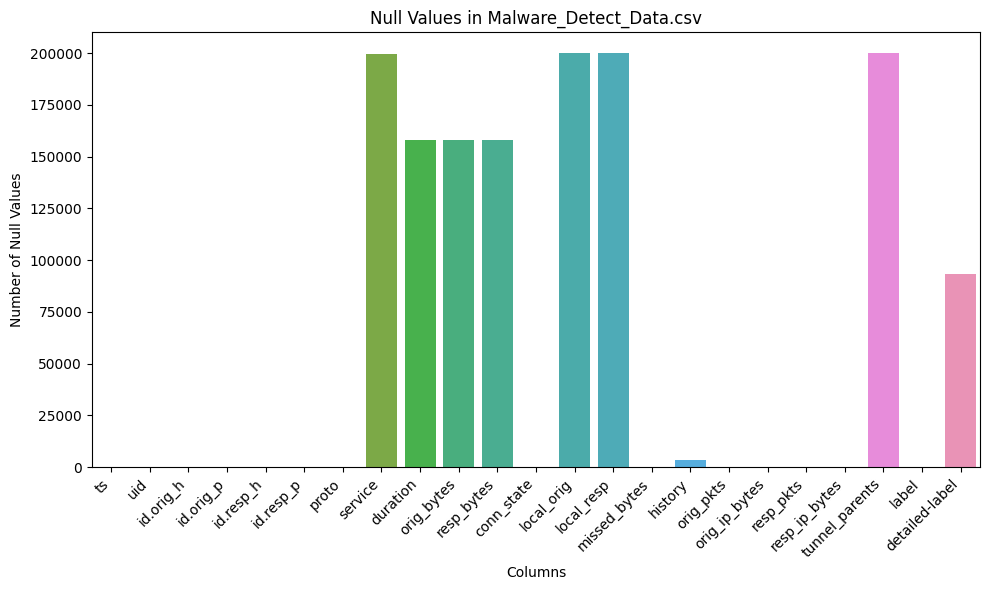

In [ ]:
# Plotting null values using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in Malware_Detect_Data.csv')
plt.tight_layout()
plt.show()

### Heatmap

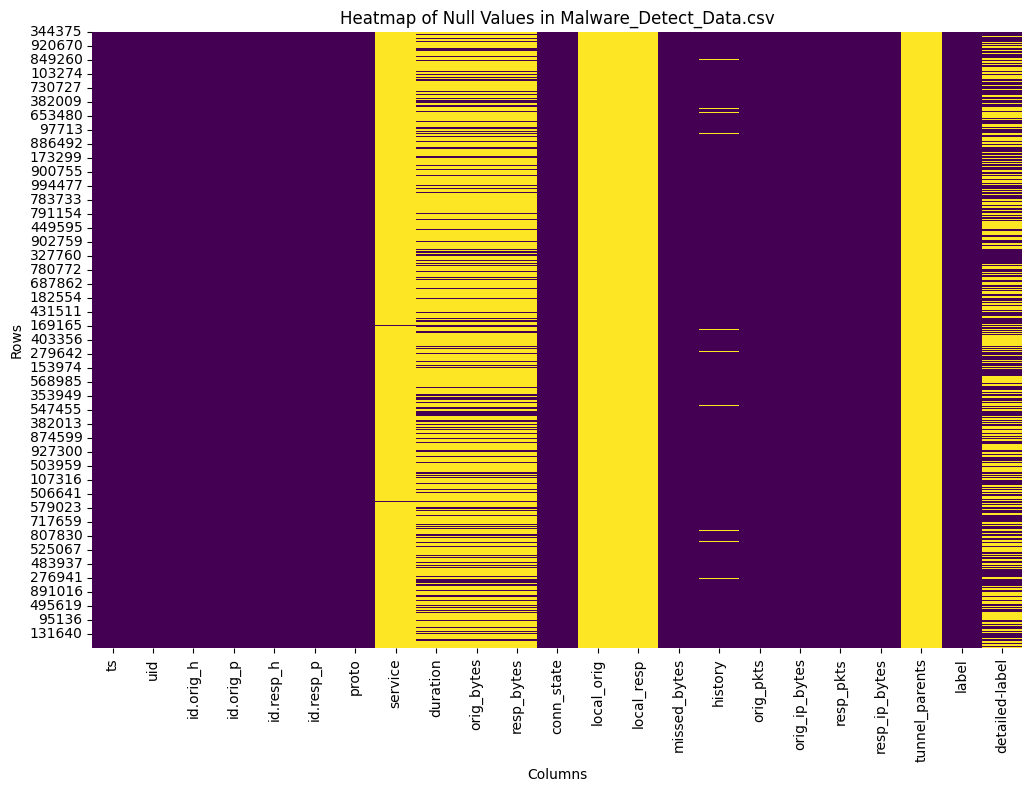

In [ ]:
# Generate a heatmap of null values
plt.figure(figsize=(12, 8))
sns.heatmap(file.isnull(), cmap='viridis', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap of Null Values in Malware_Detect_Data.csv')
plt.show()

This visualization helps you identify columns or rows with a high concentration of missing data, allowing you to decide how to handle them (e.g., impute missing values, remove rows/columns

#### Calculating null value as a percentage

In [ ]:
null_values = file.isnull().sum()

null_percentage = (null_values / len(file)) * 100

columns_with_null = null_percentage[null_percentage > 0]

print("Columns with Null Values (Percentage):")
print(columns_with_null)

Columns with Null Values (Percentage):
service            99.6760
duration           78.9885
orig_bytes         78.9885
resp_bytes         78.9885
local_orig        100.0000
local_resp        100.0000
history             1.7170
tunnel_parents    100.0000
detailed-label     46.5285
dtype: float64


The code you provided calculates the percentage of missing values in each column of your DataFrame and then identifies which columns have at least one missing value

#### Dropping column with null values that cannot be replaced

In [ ]:
# droping columns with null values
file.drop(['service','orig_bytes','resp_bytes','local_orig','local_resp','tunnel_parents'],axis=1,inplace=True)

The code you provided drops specific columns from your DataFrame file that are known to contain missing values

#### After dropping columns

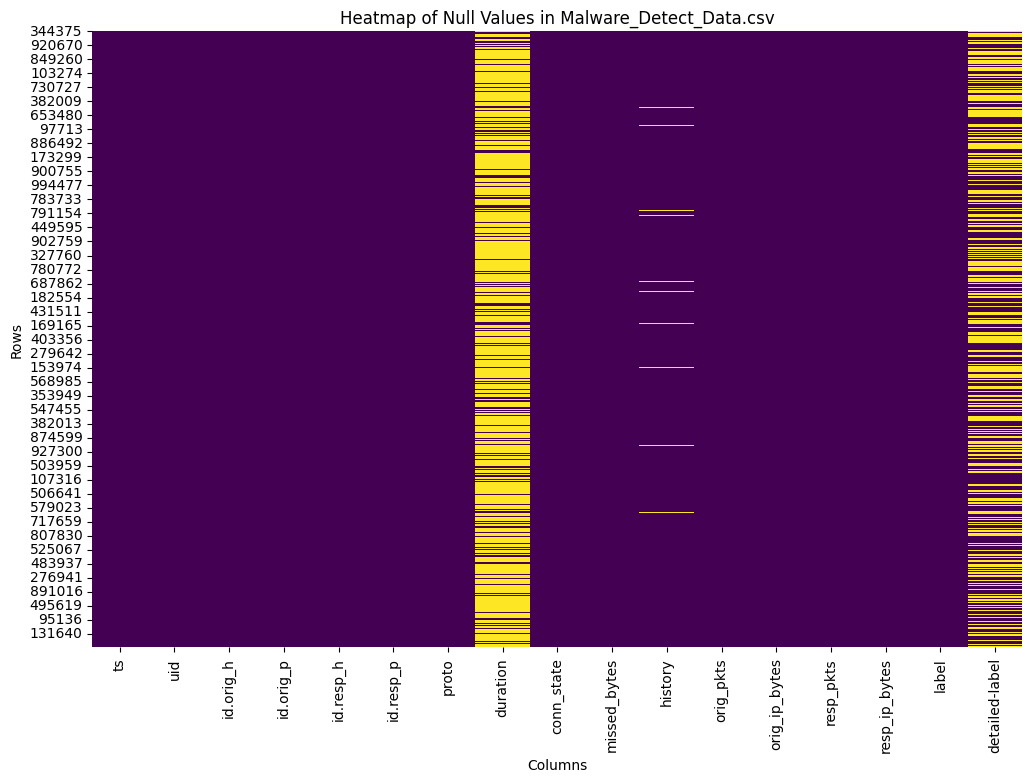

In [ ]:
#Generate a heatmap of null values
plt.figure(figsize=(12, 8))
sns.heatmap(file.isnull(), cmap='viridis', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap of Null Values in Malware_Detect_Data.csv')
plt.show()

#### Label encoding in duration

In [ ]:
label_encoder = preprocessing.LabelEncoder()
#label encode label
file['label']= label_encoder.fit_transform(file['label'])
file.head()
file['duration'] = pd.to_numeric(file['duration'])

Label encoding is a common technique used to convert categorical data (text labels) into numerical data for machine learning algorithms that typically work better with numerical features. The LabelEncoder assigns a unique integer value to each distinct category in the "label" column. However, it's important to note that label encoding does not necessarily preserve the inherent order or relationship between the categories. For example, a label encoded "1" might not necessarily signify "more severe" than a label encoded "0".

#### Correlation matrix

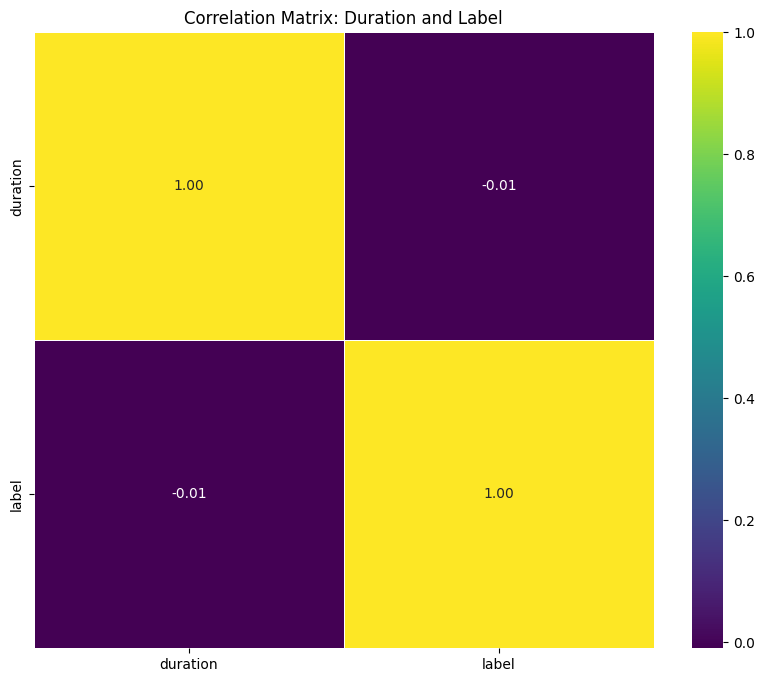

In [ ]:
selected_columns = ['duration', 'label']

# Create a DataFrame with only the selected columns
selected_file = file[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_file.corr()

plt.figure(figsize=(10, 8))

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix: Duration and Label')

plt.show()


This snippet of code check the correlation between the label and duration columns.

#### Dropping the duration column

In [ ]:
file.drop(['duration'],axis=1,inplace=True)

#### Value count of the history columns

In [ ]:
file['history'].value_counts()

S           112887
D            79609
Dd            1338
Sr             891
ShAdDafF       549
             ...  
ShAdfDFr         1
ShADF            1
ShAr             1
ShAFr            1
Fr               1
Name: history, Length: 74, dtype: int64

In [ ]:
#removing null values
file.dropna(subset=['history'], inplace=True)

#### Label Encoding of the history columns 

In [ ]:
# lael encoding of the connection states's history
label_encoder = preprocessing.LabelEncoder()
file['history']= label_encoder.fit_transform(file['history'])
file['history'].unique()

array([13,  1, 29, 70, 65, 41,  3, 44, 22, 24, 48, 31, 68, 20, 59, 26, 12,
       33, 25, 28,  4, 58, 60, 53, 57, 49, 36, 51, 69, 50, 46, 16, 21, 67,
       63, 73, 11, 55, 47,  6, 34, 15, 37, 54, 23, 10,  7, 14, 71, 30, 35,
       32, 39, 56, 17,  0, 43, 40,  9, 66, 42, 61, 72, 64, 19, 45,  2, 27,
        5, 52, 38, 62, 18,  8])

#### Counting the value of the detailed-label

In [ ]:
file['detailed-label'].value_counts()

PartOfAHorizontalPortScan    106943
Name: detailed-label, dtype: int64

In [ ]:
file.drop(file[file['detailed-label'] == 'C&C'].index, inplace = True)
file['detailed-label'].value_counts()

PartOfAHorizontalPortScan    106943
Name: detailed-label, dtype: int64

#### Filling Misssing value with na

In [ ]:
file['detailed-label'].fillna('n', inplace=True)

#### One hot Encoding to get the detailed label as an integer

In [ ]:
#onehot encode
onehot = pd.get_dummies(file['detailed-label'])
file= file.join(onehot)
file.head()
file.drop(['detailed-label'],axis=1,inplace=True)
file.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,PartOfAHorizontalPortScan,n
344375,1.526010e+09,Cq6FWN3Ywzs95oALG2,192.168.100.103,53854.0,120.10.164.48,23.0,tcp,S0,0.0,13,1.0,60.0,0.0,0.0,1,1,0
883270,1.526229e+09,Co0sIV2OSOJECc0jE3,192.168.100.103,36495.0,61.182.158.196,9527.0,tcp,S0,0.0,13,1.0,60.0,0.0,0.0,1,1,0
94977,1.525915e+09,C4rbZX3Ybr3osgdch6,192.168.100.103,56144.0,107.159.11.133,9527.0,tcp,S0,0.0,13,2.0,120.0,0.0,0.0,1,1,0
552763,1.526090e+09,Cw5ilM1d22NAOq9zR1,192.168.100.103,43763.0,172.180.210.202,41534.0,udp,S0,0.0,1,1.0,40.0,0.0,0.0,0,0,1
796999,1.526191e+09,CWBbvj2n84ONnUk1Pg,192.168.100.103,40038.0,134.153.182.254,2323.0,tcp,S0,0.0,13,1.0,60.0,0.0,0.0,1,1,0


#### Checking for Missing Values in the data

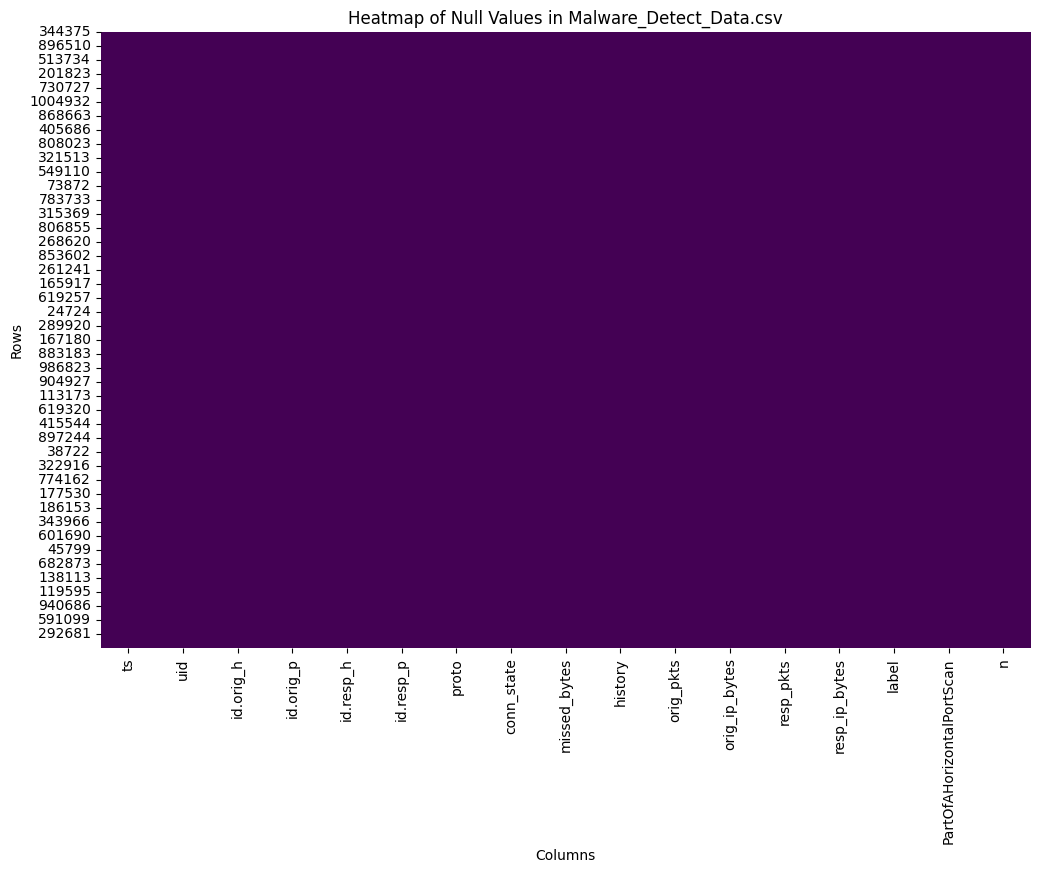

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(file.isnull(), cmap='viridis', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap of Null Values in Malware_Detect_Data.csv')
plt.show()

In [ ]:
# convert timestamp to numeric
file['ts'] = pd.to_numeric(file['ts'])
file['ts'].mean()

1526076054.326572

The code provided attempts to convert the "ts" column in your DataFrame file to a numeric data type and then calculates the mean of the converted values. 

In [ ]:
#value count of the unique indentifer of the connection
file['uid'].value_counts()

Cq6FWN3Ywzs95oALG2    1
CwCGQlnTa1kygROxb     1
ChnMmYSCa3PatHShd     1
CvA1i73H6vIa3h4THj    1
Cimmpk2koV6x2SnSb5    1
                     ..
CNZ0bl18Enz2EVRnn1    1
CxR8dGsiJQHgxuIn8     1
CGd0Ad2YQA9ywLn6A7    1
CXDZCQrNjXtuhLxu2     1
C1RyTE2zbiEe9INe7k    1
Name: uid, Length: 196566, dtype: int64

In [ ]:
#Encoding the unique indentifier of the connection
file['uid']= label_encoder.fit_transform(file['uid'])
# types of timestamp
file['uid'].value_counts()

165003    1
184461    1
138831    1
181159    1
142002    1
         ..
74975     1
188447    1
53001     1
105489    1
4702      1
Name: uid, Length: 196566, dtype: int64

In [ ]:
#count of the Source IP address
file['id.orig_h'].value_counts()

192.168.100.103    196504
210.206.154.134         3
175.196.5.46            2
201.81.12.29            2
118.163.192.88          2
184.205.112.36          1
70.4.93.96              1
222.89.165.129          1
184.205.35.93           1
79.53.73.191            1
221.5.224.77            1
186.125.204.212         1
70.4.29.242             1
81.130.230.46           1
253.167.196.105         1
195.133.38.194          1
117.96.220.109          1
70.45.29.240            1
220.91.214.87           1
173.236.242.2           1
181.48.215.81           1
175.252.56.186          1
208.156.11.70           1
106.118.227.251         1
197.7.161.230           1
24.154.127.106          1
174.154.68.156          1
31.134.1.131            1
218.61.203.113          1
110.89.36.93            1
192.168.100.1           1
223.79.110.210          1
108.119.115.232         1
154.201.189.106         1
108.111.187.69          1
173.119.247.102         1
191.139.239.120         1
178.114.200.47          1
68.240.101.5

In [ ]:
#label encoding of the source Ip address
file['id.orig_h']= label_encoder.fit_transform(file['id.orig_h'])
# types of timestamp
file['id.orig_h'].value_counts()

32    196504
38         3
19         2
36         2
9          2
24         1
52         1
43         1
25         1
55         1
42         1
29         1
51         1
56         1
46         1
33         1
8          1
53         1
41         1
16         1
22         1
20         1
37         1
0          1
34         1
45         1
18         1
47         1
39         1
6          1
31         1
44         1
4          1
11         1
2          1
12         1
30         1
21         1
48         1
57         1
15         1
3          1
26         1
40         1
54         1
13         1
17         1
1          1
23         1
27         1
10         1
50         1
14         1
49         1
5          1
28         1
7          1
35         1
Name: id.orig_h, dtype: int64

In [ ]:
#value counts of the destination IP address
file['id.resp_h'].value_counts()

147.231.100.5      887
89.221.214.130     304
213.239.154.12     293
37.187.104.44      278
192.168.100.103     62
                  ... 
226.170.84.29        1
31.31.8.190          1
158.78.202.145       1
114.19.233.206       1
75.10.105.178        1
Name: id.resp_h, Length: 172517, dtype: int64

In [ ]:
#Label Encoding of the destination IP address
file['id.resp_h']= label_encoder.fit_transform(file['id.resp_h'])
file['id.resp_h'].value_counts()

39585     887
163650    304
94905     293
121527    278
76879      62
         ... 
102917      1
117661      1
48583       1
12662       1
151656      1
Name: id.resp_h, Length: 172517, dtype: int64

In [ ]:
#count of the destination port
file['id.resp_p'].value_counts()


23.0       53870
8080.0     26904
2323.0     17397
9527.0      8772
123.0       1763
           ...  
49740.0        1
17990.0        1
28061.0        1
40304.0        1
28558.0        1
Name: id.resp_p, Length: 48066, dtype: int64

In [ ]:
#lael encoding of the destination port
file['id.resp_p']= label_encoder.fit_transform(file['id.resp_p'])
file['id.resp_p'].value_counts()

19       53870
5902     26904
1707     17397
6961      8772
93        1763
         ...  
36485        1
13154        1
20555        1
29545        1
20929        1
Name: id.resp_p, Length: 48066, dtype: int64

In [ ]:
#count of the source port

file['id.orig_p'].value_counts()

43763.0    79189
123.0       1762
23.0          42
48504.0       17
37770.0       17
           ...  
35606.0        1
47264.0        1
37256.0        1
56371.0        1
42392.0        1
Name: id.orig_p, Length: 27310, dtype: int64

In [ ]:
# Label encoding of the source port.
file['id.orig_p']= label_encoder.fit_transform(file['id.orig_p'])
file['id.orig_p'].value_counts()

10610    79189
1         1762
0           42
15201       17
4849        17
         ...  
2757         1
13986        1
4361         1
22827        1
9294         1
Name: id.orig_p, Length: 27310, dtype: int64

In [ ]:
# The count of the various protocol types
file['proto'].value_counts()

tcp    115617
udp     80949
Name: proto, dtype: int64

In [ ]:
#one hot encoding for the protocol
onehot = pd.get_dummies(file['proto'])
file = file.join(onehot)
file.head()
file.drop(['proto'],axis=1,inplace=True)
file.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,PartOfAHorizontalPortScan,n,tcp,udp
344375,1.526010e+09,165003,32,20388,17658,19,S0,0.0,13,1.0,60.0,0.0,0.0,1,1,0,1,0
883270,1.526229e+09,158451,32,3623,140852,6961,S0,0.0,13,1.0,60.0,0.0,0.0,1,1,0,1,0
94977,1.525915e+09,15475,32,22605,6794,6961,S0,0.0,13,2.0,120.0,0.0,0.0,1,1,0,1,0
552763,1.526090e+09,184095,32,10610,60185,30455,S0,0.0,1,1.0,40.0,0.0,0.0,0,0,1,0,1
796999,1.526191e+09,102158,32,7023,28520,1707,S0,0.0,13,1.0,60.0,0.0,0.0,1,1,0,1,0


In [ ]:
# The value count of the various state of connection
file['conn_state'].value_counts()

S0        192498
SF          2836
REJ          891
RSTR         266
RSTOS0        45
RSTRH         12
RSTO           7
SH             6
S2             3
S1             2
Name: conn_state, dtype: int64

In [ ]:
#label encode conn_state
file['conn_state']= label_encoder.fit_transform(file['conn_state'])
file['conn_state'].value_counts()

5    192498
8      2836
0       891
3       266
2        45
4        12
1         7
9         6
7         3
6         2
Name: conn_state, dtype: int64

In [ ]:
# The count of the nuber of missing in the connection 
file['missed_bytes'].value_counts()

0.0    196566
Name: missed_bytes, dtype: int64

In [ ]:
#drop column
file.drop(['missed_bytes'],axis=1,inplace=True)

In [ ]:
# The count of the various packets from the souce to the destination
file['orig_pkts'].value_counts()

1.0     156986
3.0      37726
5.0        439
4.0        183
2.0        182
8.0        103
28.0        93
29.0        61
27.0        59
26.0        57
24.0        55
12.0        49
23.0        48
15.0        44
11.0        42
13.0        40
25.0        35
9.0         34
22.0        29
18.0        27
7.0         25
30.0        23
6.0         20
45.0        20
19.0        20
20.0        18
21.0        18
14.0        17
31.0        15
44.0        15
10.0        11
16.0        11
0.0          8
32.0         6
39.0         5
17.0         5
46.0         5
37.0         4
43.0         4
35.0         4
38.0         4
36.0         4
33.0         3
34.0         3
47.0         2
40.0         2
41.0         1
48.0         1
Name: orig_pkts, dtype: int64

In [ ]:
# COnverting the packet columns tonumeric datatype
file['orig_pkts'] = pd.to_numeric(file['orig_pkts'])

In [ ]:
#  Converting the Number of byte sent from source destination to numeric
file['orig_ip_bytes'] = pd.to_numeric(file['orig_ip_bytes'])

In [ ]:
# Converting the number of packetsent to  numeriic
file['resp_pkts'] = pd.to_numeric(file['resp_pkts'])


In [ ]:
# Converting number of byte sent from destination to source to numeric
file['resp_ip_bytes'] = pd.to_numeric(file['resp_ip_bytes'])

In [ ]:
# Count of the label 1 means Malicious, 0 means Benign
file['label'].value_counts()

1    106943
0     89623
Name: label, dtype: int64

In [ ]:
#label encode label columns
file['label']= label_encoder.fit_transform(file['label'])
file.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,PartOfAHorizontalPortScan,n,tcp,udp
344375,1.526010e+09,165003,32,20388,17658,19,5,13,1.0,60.0,0.0,0.0,1,1,0,1,0
883270,1.526229e+09,158451,32,3623,140852,6961,5,13,1.0,60.0,0.0,0.0,1,1,0,1,0
94977,1.525915e+09,15475,32,22605,6794,6961,5,13,2.0,120.0,0.0,0.0,1,1,0,1,0
552763,1.526090e+09,184095,32,10610,60185,30455,5,1,1.0,40.0,0.0,0.0,0,0,1,0,1
796999,1.526191e+09,102158,32,7023,28520,1707,5,13,1.0,60.0,0.0,0.0,1,1,0,1,0


# Model Selection

### Train Test Split

In [ ]:


from sklearn.model_selection import train_test_split

X = file.drop('label', axis=1)
y = file['label']

# Split the DataFrame into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.head()
y_train.value_counts()


1    85547
0    71705
Name: label, dtype: int64

The code provided imports a library and splits your data into training and testing sets. Here's a breakdown of what each part does:

Importing train_test_split from sklearn.model_selection:

This line imports the train_test_split function from the sklearn.model_selection module. This function is commonly used in machine learning to split a dataset into training and testing sets.
Splitting Data into X and y:

X = file.drop('label', axis=1): This line creates a new DataFrame called X that contains all columns of file except the "label" column. In machine learning, features (independent variables) are often stored in a separate DataFrame or array from the target variable (dependent variable).
y = file['label']: This line assigns the "label" column from file to a separate variable y. This variable represents the target variable that your machine learning model will try to predict.
Splitting Data Using Train-Test Split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): This line splits the data into training and testing sets using the train_test_split function.
X: This refers to the features DataFrame you created (X).
y: This refers to the target variable (y).
test_size=0.2: This argument specifies that 20% (0.2) of the data will be allocated to the testing set. The remaining 80% will be used for training.
random_state=42: This sets a seed for the random number generator, ensuring that you get the same split every time you run the code (assuming all other conditions are the same). This helps with reproducibility.
The result of this line is four variables:
X_train: This contains the training features.
X_test: This contains the testing features.
y_train: This contains the training target labels.
y_test: This contains the testing target labels.
Displaying Training Labels:

y_train.head(): This line displays the first few rows of the y_train DataFrame to give you an idea of the training target labels (e.g., categories or values).
y_train.value_counts(): This line displays the frequency counts of the different categories or values present in the training target labels. This can help you understand the class distribution in your training data.

In [ ]:
file

NameError: name 'file' is not defined

### Normalisation

In [ ]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

The code provided applies a normalization technique to your training and testing data sets. Here's a breakdown of what each line does:

Importing Normalizer:

from sklearn.preprocessing import Normalizer: This line imports the Normalizer class from the sklearn.preprocessing module. The Normalizer performs normalization by scaling each sample (row) in a dataset to have a unit L2 norm (Euclidean norm) of 1.
Creating a Normalizer Object:

scaler = Normalizer(): This line creates an instance of the Normalizer class.
Normalizing Training Data:

X_train_scaled = scaler.fit_transform(X_train): This line performs normalization on the training data (X_train).
scaler.fit_transform(...): The fit_transform method is used here. It does two things:
fit: In the context of normalization (unlike scaling techniques like StandardScaler), the fit step doesn't necessarily learn parameters from the data. It might perform preliminary calculations needed for the normalization process.
transform: This applies the normalization transformation to each sample in X_train. The result is stored in the new variable X_train_scaled.
Normalizing Testing Data (Reusing the Normalizer):

X_test_scaled = scaler.transform(X_test): This line normalizes the testing data (X_test) using the same scaler object. Because the fit step (if any) has already been performed during training data normalization, you can call transform directly here. The result is stored in X_test_scaled.
Why Normalize Data?

Normalization can be beneficial for machine learning algorithms that are sensitive to the scale of the features. By transforming each sample to have a unit L2 norm, normalization ensures that all features contribute approximately equally to the distance calculations used by many machine learning models. This can improve the performance and stability of some algorithms.

In [ ]:
X = X_train[:500]
y = y_train[:500]
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 5.0 s
PCA took 0.003 s
Truncated SVD took 0.0052 s


The code provided compares the execution time of three dimensionality reduction techniques: t-SNE, PCA, and Truncated SVD. Here's a breakdown of what each part does:

Selecting a Subset of Data (Optional):

X = X_train[:500] & y = y_train[:500]: These lines create subsets containing the first 500 samples from the training features (X_train) and target labels (y_train). This step is optional and might be useful if you're dealing with very large datasets to speed up the dimensionality reduction process for demonstration purposes.
t-SNE Implementation:

t0 = time.time() & t1 = time.time(): These lines measure the execution time using Python's time module. t0 captures the starting time before the t-SNE execution, and t1 captures the ending time after execution.
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values): This line performs dimensionality reduction using t-SNE.
TSNE(n_components=2, random_state=42): This creates an instance of the TSNE class from a scikit-learn library, specifying the number of desired output dimensions (2 in this case) and setting a random seed for reproducibility.
.fit_transform(X.values): This applies t-SNE to the data in X (converted to NumPy array using .values). The result is stored in X_reduced_tsne, which contains the lower-dimensional representation of the data.
print("T-SNE took {:.2} s".format(t1 - t0)): This line calculates the elapsed time between t0 and t1 and prints a message indicating how long t-SNE took to execute for the given data subset.
PCA Implementation (Similar Structure):

The code for PCA follows a similar structure as t-SNE. It measures execution time, creates a PCA object specifying the number of components (2) and random state, applies the dimensionality reduction using .fit_transform, stores the result in X_reduced_pca, and prints the execution time.
Truncated SVD Implementation (Similar Structure):

Similar to PCA and t-SNE, this code snippet measures execution time, creates a TruncatedSVD object specifying the number of components (2), random state, and algorithm ('randomized' in this case), applies dimensionality reduction, stores the result, and prints the execution time.
Key Points:

t-SNE is generally slower than PCA and Truncated SVD because it's a more complex algorithm that aims to preserve non-linear relationships in the data.
PCA and Truncated SVD are linear dimensionality reduction techniques and might be faster for high-dimensional data.
The choice of dimensionality reduction technique depends on the characteristics of your data and the goal of the analysis. t-SNE might be preferred if you suspect non-linear relationships in your data, while PCA or Truncated SVD might be faster alternatives for linear dimensionality reduction.

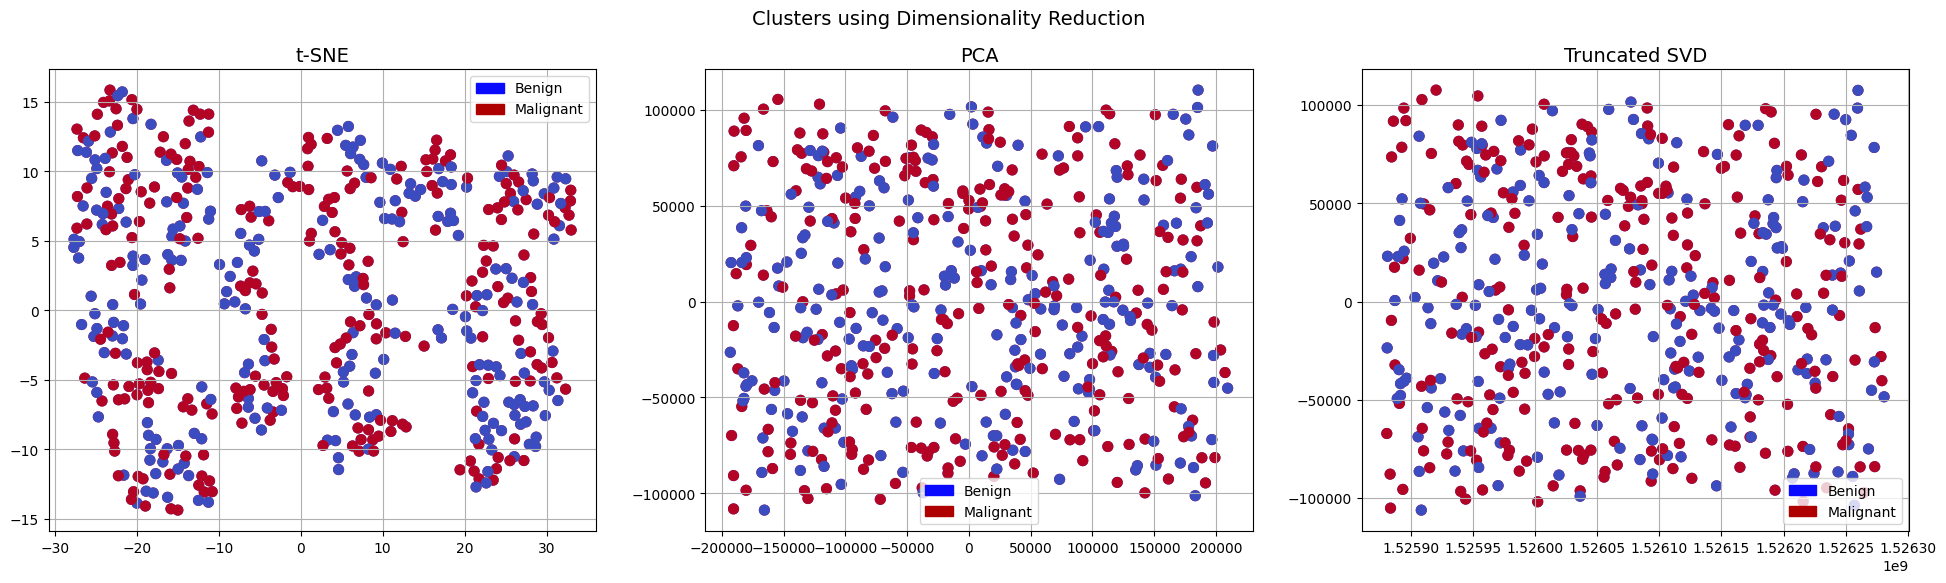

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['Benign', 'Malignant']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malignant')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Benign', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Malignant', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Benign', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Malignant', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Benign', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Malignant', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

The code provided creates a three-panel plot to visualize the results of dimensionality reduction using t-SNE, PCA, and Truncated SVD on your data while coloring points based on the class labels ("Benign" and "Malignant"). Here's a breakdown of what each part does:

Setting Up the Plot:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6)): This line creates a figure (f) with three subplots (ax1, ax2, and ax3) arranged in a row (1 row, and 3 columns). It also sets the figure size to be 24 inches wide and 6 inches high for better visualization.
Suptitle and Legend Patches:

f.suptitle('Clusters using Dimensionality Reduction', fontsize=14): This line adds a title above all subplots, indicating "Clusters using Dimensionality Reduction".
blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign'): This line creates a colored patch object with a blue color and label "Benign" to be used in the legend.
red_patch = mpatches.Patch(color='#AF0000', label='Malignant'): This line creates a colored patch object with a red color and label "Malignant" to be used in the legend.
Scatter Plots (Similar Structure for Each Panel):

t-SNE Scatter Plot (ax1):
ax1.scatter(...): This line creates a scatter plot on the first subplot (ax1).
X_reduced_tsne[:,0], X_reduced_tsne[:,1]: This specifies the x and y coordinates for the scatter plot points, obtained from the two-dimensional representation of the data after t-SNE reduction.
c=(y == 0): This condition assigns a color based on the target label ("Benign" or "Malignant"). If y is equal to 0 (indicating "Benign"), the color is chosen from the 'coolwarm' colormap.
cmap='coolwarm': This specifies the colormap used to represent the target label. 'coolwarm' goes from blue (potentially for "Benign") to yellow/orange (potentially for "Malignant").
label='Benign': This sets the label for the "Benign" class points in the legend.
linewidths=2: This sets the width of the lines around each data point to 2 for better visibility.
Similar logic is applied to create another scatter plot on ax1 for the "Malignant" class points using the condition (y == 1).
PCA Scatter Plot (ax2): (Similar structure to t-SNE scatter plot on ax1 using X_reduced_pca for data points)
Truncated SVD Scatter Plot (ax3): (Similar structure to t-SNE and PCA scatter plots using X_reduced_svd for data points)
Adding Titles, Grid, and Legend (Similar for Each Panel):

ax1.set_title('t-SNE', fontsize=14): This sets the title for the first subplot as "t-SNE".
ax1.grid(True): This enables a grid on the subplot for better visual reference.
ax1.legend(handles=[blue_patch, red_patch]): This adds a legend to the subplot using the pre-defined colored patch objects (blue_patch and red_patch) to represent the classes.
Displaying the Plot:

plt.show(): This line displays the generated three-panel plot, allowing you to compare how the data is clustered in the lower-dimensional spaces after applying t-SNE, PCA, and Truncated SVD.

In [ ]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostClassifier": GradientBoostingClassifier()
}

The code provided defines a dictionary named classifiers that contains several machine learning classification algorithms from scikit-learn. Here's a breakdown of the algorithms included:

Logistic Regression:

LogisticRegression(): This creates an instance of the LogisticRegression class. Logistic regression is a linear classification algorithm that models the relationship between features and a binary target variable (like "Benign" or "Malignant" in your case).
K-Nearest Neighbors (KNN):

KNeighborsClassifier(): This creates an instance of the KNeighborsClassifier class. KNN is a non-parametric classification algorithm that classifies a data point based on the majority vote of its k nearest neighbors in the training data.
Decision Tree Classifier:

DecisionTreeClassifier(): This creates an instance of the DecisionTreeClassifier class. Decision trees are tree-like models that learn a set of rules to classify data points based on their features.
Random Forest Classifier:

RandomForestClassifier(): This creates an instance of the RandomForestClassifier class. Random forests are ensemble learning methods that combine multiple decision trees to improve classification performance and reduce overfitting.
Gradient Boosting Classifier:

GradientBoostingClassifier(): This creates an instance of the GradientBoostingClassifier class. Gradient boosting is another ensemble learning method that builds an ensemble of weaker models (often decision trees) sequentially, each one focusing on improving the areas where the previous models made errors.
This dictionary provides a convenient way to store and reference different classification algorithms for further use in your machine learning pipeline.

In [ ]:
X_train = X_train_scaled
X_test = X_test_scaled

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,precision_recall_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Assuming X_train, X_test, y_train, y_test are already defined

classifiers = {
  "LogisticRegression": LogisticRegression(),
  "KNearestNeighbors": KNeighborsClassifier(),
  "DecisionTreeClassifier": DecisionTreeClassifier(),
  "RandomForestClassifier": RandomForestClassifier(),
  "GradientBoostingClassifier": GradientBoostingClassifier()
}

# Set up cross-validation
for key, classifier in classifiers.items():
    print(f"\n**Classifier: {classifier.__class__.__name__}**")
  
    # Evaluate using cross-validation
    cv_results = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=5)
    cross_val_accuracy = cv_results.mean() * 100
    print(f"Cross-Validation Accuracy: {round(cross_val_accuracy, 2)}%")

    # Train the classifier on the full training set
    classifier.fit(X_train, y_train)

    # Optional: Evaluate on test set
    if X_test is not None and y_test is not None:  
        y_pred = classifier.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred) * 100
        roc_auc_sc = roc_auc_score(y_test, y_pred)
        prc = precision_recall_curve(y_test, y_pred)
        print(f"Test Set Accuracy: {round(test_accuracy, 2)}%")
        print(f"Test roc-auc_score: {round(roc_auc_sc, 2)}%")
        print(f"Test precision_recall_curve: {prc}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")



**Classifier: LogisticRegression**
Cross-Validation Accuracy: 54.4%
Test Set Accuracy: 54.42%
Test roc-auc_score: 0.5%
Test precision_recall_curve: (array([0.54423361, 1.        ]), array([1., 0.]), array([1], dtype=int64))
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17918
           1       0.54      1.00      0.70     21396

    accuracy                           0.54     39314
   macro avg       0.27      0.50      0.35     39314
weighted avg       0.30      0.54      0.38     39314

Confusion Matrix:
[[    0 17918]
 [    0 21396]]

**Classifier: KNeighborsClassifier**
Cross-Validation Accuracy: 93.81%
Test Set Accuracy: 94.25%
Test roc-auc_score: 0.94%
Test precision_recall_curve: (array([0.54423361, 0.94120631, 1.        ]), array([1.        , 0.95396336, 0.        ]), array([0, 1], dtype=int64))
Classification Report:
              precision    recall  f1-score   support

           0       0.94   

This process allows you to compare the performance of different classifiers on your dataset using cross-validation and, optionally, evaluate their performance on a separate test set.

# Neural Network

In [ ]:
n_inputs = X_train.shape[1]

sample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
sample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 882
Trainable params: 882
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
sample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
5033/5033 - 12s - loss: 0.6896 - accuracy: 0.5440 - val_loss: 0.6893 - val_accuracy: 0.5441 - 12s/epoch - 2ms/step
Epoch 2/20
5033/5033 - 11s - loss: 0.6895 - accuracy: 0.5440 - val_loss: 0.6894 - val_accuracy: 0.5441 - 11s/epoch - 2ms/step
Epoch 3/20
5033/5033 - 11s - loss: 0.6894 - accuracy: 0.5440 - val_loss: 0.6892 - val_accuracy: 0.5441 - 11s/epoch - 2ms/step
Epoch 4/20
5033/5033 - 11s - loss: 0.6893 - accuracy: 0.5440 - val_loss: 0.6892 - val_accuracy: 0.5441 - 11s/epoch - 2ms/step
Epoch 5/20
5033/5033 - 12s - loss: 0.6894 - accuracy: 0.5440 - val_loss: 0.6894 - val_accuracy: 0.5441 - 12s/epoch - 2ms/step
Epoch 6/20
5033/5033 - 11s - loss: 0.6893 - accuracy: 0.5440 - val_loss: 0.6893 - val_accuracy: 0.5441 - 11s/epoch - 2ms/step
Epoch 7/20
5033/5033 - 12s - loss: 0.6893 - accuracy: 0.5440 - val_loss: 0.6893 - val_accuracy: 0.5441 - 12s/epoch - 2ms/step
Epoch 8/20
5033/5033 - 11s - loss: 0.6893 - accuracy: 0.5440 - val_loss: 0.6892 - val_accuracy: 0.5441 - 11s/epoch - 2

In [ ]:
sample_predictions =sample_model.predict(X_test, batch_size=200, verbose=0)

In [ ]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [ ]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50,input_dim=n_inputs,activation='relu',kernel_initializer='he_uniform'))
# define output
model.add(Dense(1,activation='sigmoid'))
# define loss and optimiser
model.compile(loss='binary_crossentropy',optimizer= 'adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
4915/4915 [==============================] - 13s 2ms/step - loss: 0.6895
Epoch 2/10
4915/4915 [==============================] - 12s 3ms/step - loss: 0.6895
Epoch 3/10
4915/4915 [==============================] - 12s 2ms/step - loss: 0.6894
Epoch 4/10
4915/4915 [==============================] - 11s 2ms/step - loss: 0.6894
Epoch 5/10
4915/4915 [==============================] - 12s 2ms/step - loss: 0.6894
Epoch 6/10
4915/4915 [==============================] - 13s 3ms/step - loss: 0.6892
Epoch 7/10
4915/4915 [==============================] - 12s 2ms/step - loss: 0.6892
Epoch 8/10
4915/4915 [==============================] - 12s 2ms/step - loss: 0.6892
Epoch 9/10
4915/4915 [==============================] - 13s 3ms/step - loss: 0.6891
Epoch 10/10
4915/4915 [==============================] - 12s 2ms/step - loss: 0.6890


In [ ]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict(X_test)
print(roc_auc_score(y_test, y_pred))

1229/1229 [==============================] - 3s 2ms/step
0.9176628165625458


In [ ]:
weights_assigned = {0:1, 1:2}

In [ ]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50,input_dim=n_inputs,activation='relu',kernel_initializer='he_uniform'))
# define output
model.add(Dense(1,activation='sigmoid'))
# define loss and optimiser
model.compile(loss='binary_crossentropy',optimizer= 'adam')
model.fit(X_train,y_train,class_weight=weights_assigned, epochs=10)

Epoch 1/10
4915/4915 [==============================] - 14s 3ms/step - loss: 0.9380
Epoch 2/10
4915/4915 [==============================] - 13s 3ms/step - loss: 0.9373
Epoch 3/10
4915/4915 [==============================] - 13s 3ms/step - loss: 0.9372
Epoch 4/10
4915/4915 [==============================] - 14s 3ms/step - loss: 0.9372
Epoch 5/10
4915/4915 [==============================] - 13s 3ms/step - loss: 0.9371
Epoch 6/10
4915/4915 [==============================] - 14s 3ms/step - loss: 0.9370
Epoch 7/10
4915/4915 [==============================] - 13s 3ms/step - loss: 0.9370
Epoch 8/10
4915/4915 [==============================] - 14s 3ms/step - loss: 0.9368
Epoch 9/10
4915/4915 [==============================] - 13s 3ms/step - loss: 0.9367
Epoch 10/10
4915/4915 [==============================] - 14s 3ms/step - loss: 0.9366


In [ ]:
y_pred1 = model.predict(X_test)
print(roc_auc_score(y_test, y_pred1))


1229/1229 [==============================] - 3s 2ms/step
0.9180187044630792


The best performing model are the KNNs and The Convoluted Neural network

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# saving the model 
import pickle 
pickle_out = open("classifier1.pkl", mode = "wb") 
pickle.dump(KNN, pickle_out) 
pickle_out.close()

In [ ]:
# saving the model 

model.save('model.h5')